In [2]:
import seaborn as sns
import matplotlib as mpl
# from scipy.optimize import curve_fit
%run loading_tissue
%run score_cc_finding

In [4]:
import scanpy as sc
import anndata

In [5]:
data_dir = '../Tabula Sapiens'
tissue = 'Liver'
filename = 'TS_{}.h5ad'.format(tissue)

In [6]:
ad = sc.read_h5ad('{}/{}'.format(data_dir, filename))

In [31]:
# ad.X.toarray().shape
ad.obs.cell_ontology_class.value_counts()


hepatocyte                              1558
macrophage                              1381
monocyte                                 612
endothelial cell of hepatic sinusoid     421
endothelial cell                         267
nk cell                                  245
t cell                                   146
erythrocyte                              108
neutrophil                                83
fibroblast                                76
intrahepatic cholangiocyte                42
plasma cell                               34
liver dendritic cell                      34
Name: cell_ontology_class, dtype: int64

In [22]:
ad.obs.head()

organ_tissue method donor  \
cell_id                                                            
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1        Liver    10X  TSP6   
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1        Liver    10X  TSP6   
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1        Liver    10X  TSP6   
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1        Liver    10X  TSP6   
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1        Liver    10X  TSP6   

                                       anatomical_information  n_counts_UMIs  \
cell_id                                                                        
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1                    nan         7633.0   
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1                    nan         2858.0   
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1                    nan         7787.0   
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1                    nan        10395.0   
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1                    nan         6610.0   

                                        n_genes  \
cell_id                                           
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1     2259   
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1     1152   
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1     2983   
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1     2598   
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1     2125   

                                                         cell_ontology_class  \
cell_id                                                                        
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1                            macrophage   
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1                              monocyte   
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1  endothelial cell of hepatic sinusoid   
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1                            macrophage   
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1                  liver dendritic cell   

                                            free_annotation  \
cell_id                                                       
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1  Monocyte/Macrophage   
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1             Monocyte   
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1          Endothelial   
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1  Monocyte/Macrophage   
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1       Dendritic cell   

                                        manually_annotated  compartment gender  
cell_id                                                                         
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1                True       immune   male  
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1                True       immune   male  
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1                True  endothelial   male  
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1                True       immune   male  
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1                True       immune   male

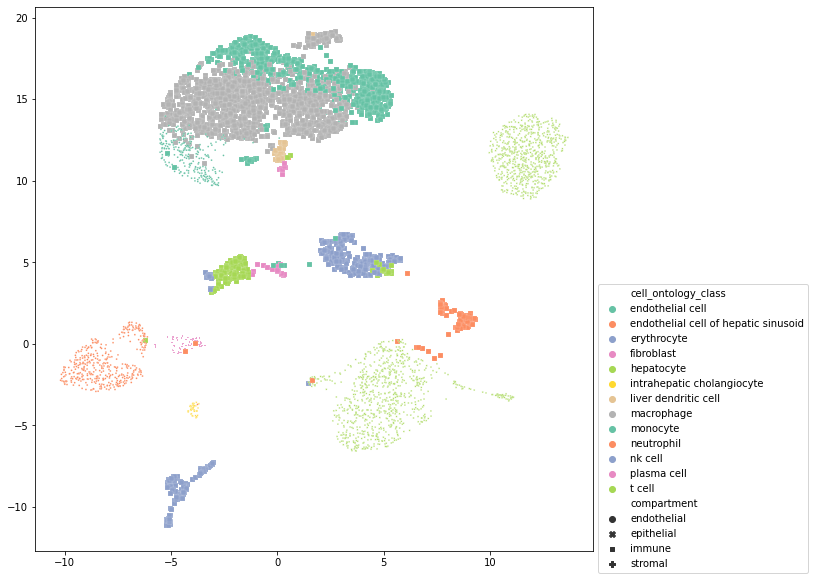

In [30]:
plt.figure(figsize=(10,10))
ad.obs['size'] = ad.obs.compartment.map({'immune': 50, 'endothelial': 3, 'epithelial': 3, 'stromal': 3})
ax= sns.scatterplot(x=ad.obsm['X_umap'][:,0], y=ad.obsm['X_umap'][:,1], hue=ad.obs.cell_ontology_class, style=ad.obs.compartment, s=ad.obs['size'], palette='Set2')
sns.move_legend(ax, loc='upper left',bbox_to_anchor=(1,0.5))